# Week 2.5 Assignment
I would prefer to carry out this exercise within a Jupyter notebook. The rationale behind this choice is that Jupyter notebooks offer robust visualization tools for every code step, making them an ideal environment for various stages of the data science pipeline. Given that the objective of this task is to inspect a big dataset, using a Jupyter notebook would likely result in better visualization of different aspects of the dataset. However, I will provide a '.py' file based on this notebook as well.

# Protein Annotation
Annotation plays a vital role in enhancing our understanding of proteins, offering valuable insights into their functions, characteristics, and interactions. Proteins, composed of sequences of amino acids, are the building blocks of life. The process of protein annotation involves enriching these sequences or structures with additional information, shedding light on their roles within biological systems. This information can be garnered through rigorous experimentation, computational analysis, or a blend of both methodologies.

Protein annotation encompasses several key facets. It illuminates the functions of proteins within cells and organisms, revealing details like enzymatic activities, binding partners, and contributions to various cellular processes. It also deciphers the intricate domain structure of proteins, identifying distinct functional or structural units within them. Beyond this, annotation unveils post-translational modifications that proteins undergo after synthesis, such as phosphorylation or glycosylation, elucidating their effects. Additionally, it uncovers the complex web of interactions proteins engage in, including interactions with DNA, RNA, other proteins, or small molecules, thereby highlighting their biological significance.

Furthermore, annotation holds the power to pinpoint where proteins reside within cells, offering valuable clues about their roles. For proteins with known 3D structures, annotation can illuminate critical structural features like active sites or binding pockets. It also delves into the evolutionary conservation of proteins, identifying regions that remain consistent across species and hinting at their fundamental importance. Moreover, annotation establishes connections between proteins and specific diseases, unraveling how proteins contribute to various medical conditions. Backed by references to scientific literature, these annotations provide a thorough foundation for researchers, enabling them to delve deeper into the underpinnings of protein functionality.

One can delve into following links and articles to find extra information: <a href="https://medcraveonline.com/MOJPB/computational-annotation-of-protein-function.html" target="_blank">link1</a>, <a href="https://www.rcsb.org/docs/exploring-a-3d-structure/annotations#protein-sequence-annotations-" target="_blank">link2</a>, <a href="https://www.uniprot.org/help/sequence_annotation" target="_blank">link3</a>, <a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5586544/" target="_blank">Article1</a>, <a href="https://genomebiology.biomedcentral.com/articles/10.1186/gb-2009-10-2-207" target="_blank">Article2</a>.

# InterProScan protein annotation service
InterProScan is a valuable service that delves into the world of proteins, shedding light on their complexities through annotations. These annotations act like detailed descriptions, helping us grasp the functions and traits that define proteins' roles within living systems (as it mentioed above in detail).

Think of InterProScan as a conductor orchestrating a symphony of protein function annotators. Instead of being a solo performer, it coordinates a sequence of annotators, each specializing in different aspects. Just like musicians playing different instruments, these annotators inspect protein amino acid sequences, revealing insights into their structures, behaviors, and functions. As they come together like harmonious melodies, these annotations provide a comprehensive picture of the intricate world of proteins.

Imagine InterProScan as the conductor guiding this symphony of protein function annotators. Similar to how a conductor brings together musicians' contributions, InterProScan collects and compiles annotations, creating a comprehensive guide similar to sheet music. These annotations marked with unique "InterPRO numbers" that scientists and researchers use to navigate the complexities of protein functions.

links: <a href="https://hanze-hbo-ict.github.io/programming2/week2.5.html" target="_blank">link1</a>, <a href="https://interpro-documentation.readthedocs.io/en/latest/interproscan.html" target="_blank">link2</a>, <a href="http://www.ebi.ac.uk/interpro/" target="_blank">Article</a>.

# Loading Dataset
In this part I utilize Assemblix2019 and dask package to load the dataset and answer the questions.

Good work. Also nice that you delved into the details of this dataset and used the information gained to better your work.

In [1]:
# packages
from dask.distributed import Client
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import dask.dataframe as dd

In [ ]:
# Make your client
client = Client(n_workers=4)
client

In [2]:
link = '/data/dataprocessing/interproscan/all_bacilli.tsv'
ddf = dd.read_csv(link, delimiter='\t', dtype={'1.6E-21': 'object'})                          

In [3]:
ddf.head()

,gi|29898682|gb|AAP11954.1|,92d1264e347e149248231cb9b649388c,547,TIGRFAM,TIGR03882,cyclo_dehyd_2: bacteriocin biosynthesis cyclodehydratase domain,2,131,1.6E-21,T,25-04-2022,IPR022291,"Bacteriocin biosynthesis, cyclodehydratase domain",-,-.1
0,gi|29898682|gb|AAP11954.1|,92d1264e347e149248231cb9b649388c,547,TIGRFAM,TIGR03604,TOMM_cyclo_SagD: thiazole/oxazole-forming pept...,161,547,0.0,T,25-04-2022,IPR027624,"Thiazole/oxazole-forming peptide maturase, Sag...",-,-
1,gi|29898682|gb|AAP11954.1|,92d1264e347e149248231cb9b649388c,547,ProSiteProfiles,PS51664,YcaO domain profile.,159,547,75.396477,T,25-04-2022,IPR003776,YcaO-like domain,-,-
2,gi|29898682|gb|AAP11954.1|,92d1264e347e149248231cb9b649388c,547,Gene3D,G3DSA:3.30.160.660,-,311,452,9.1E-46,T,25-04-2022,-,-,NaN,NaN
3,gi|29898682|gb|AAP11954.1|,92d1264e347e149248231cb9b649388c,547,Gene3D,G3DSA:3.30.40.250,-,191,274,9.1E-46,T,25-04-2022,-,-,NaN,NaN
4,gi|29898682|gb|AAP11954.1|,92d1264e347e149248231cb9b649388c,547,PANTHER,PTHR37809,RIBOSOMAL PROTEIN S12 METHYLTHIOTRANSFERASE AC...,95,547,0.0,T,25-04-2022,-,-,NaN,NaN


In [60]:
# find the number of samples within this dataset.
len(ddf)

4200590

Before answering the questions, I think finding the columns names of this dataset is the first priority since there is no description and information about the content of each column.

After spending fourty minutes in the InterPro website, I found this <a href="https://interproscan-docs.readthedocs.io/en/latest/OutputFormats.html#tab-separated-values-format-tsv" target="_blank">link</a> that contains the information and headings of each column.

The TSV format presents the match data in columns as follows:

1. **Protein accession** (e.g. P51587): A protein accession is a unique identifier assigned to a protein sequence or entry in a protein database. It serves as a standardized way to uniquely identify and reference specific proteins across different databases and resources. Protein accessions are used to facilitate communication, data sharing, and cross-referencing among researchers, databases, and bioinformatics tools. <a href="https://en.wikipedia.org/wiki/Accession_number_(bioinformatics)" target="_blank">wiki</a>, <a href="https://www.ncbi.nlm.nih.gov/books/NBK470040/" target="_blank">link</a>
    
2. **Sequence MD5 digest** (e.g. 14086411a2cdf1c4cba63020e1622579): is a cryptographic hash algorithm used to generate a 128-bit digest from a string of any length. It represents the digests as 32 digit hexadecimal numbers. Ronald Rivest designed this algorithm in 1991 to provide the means for digital signature verification. <a href="https://www.simplilearn.com/tutorials/cyber-security-tutorial/md5-algorithm" target="_blank">link</a>

3. **Sequence length** (e.g. 3418): Is the number of amino-acids in a protein sequence.

4. **Analysis** (e.g. Pfam / PRINTS / Gene3D): Is analyzing methods used by different organizations and universities. FOr more information one can have a look at 'member database' section of the following <a href="http://www.ebi.ac.uk/interpro/" target="_blank">link</a>.
    
5. **Signature accession** (e.g. PF09103 / G3DSA:2.40.50.140): is the accession number of the proteins related to the analyzing organizatons that they have been accumulated in. 
   
6. **Signature description** (e.g. BRCA2 repeat profile): is a concise explanation of each protein sequence.

7. **Start location**: Is the start point of the amino acid sequence in the whole protein structure.
   
8. **Stop location**: Is the start point of the amino acid sequence in the whole protein structure.

9. **Score**: is the e-value (or score) of the match reported by member database method (e.g. 3.1E-52). It means that the likelihood of the observed match occurring randomly is extremely low, indicating a strong indication of a significant match between the query sequence and the database entry. Lower e-values signify more significant matches, while higher values suggest matches that might have occurred by chance.

10. **Status**: is the status of the match (T: true)
   
11. **Date**: is the date of the run

12. **InterPro annotations accession** (e.g. IPR002093): is the accesseion number belongs to the InterPro organization.

13. **InterPro annotations description** (e.g. BRCA2 repeat): is the description of the proteins stated by InterPro organization.

14. **GO annotations** (e.g. GO:0005515): (optional column; only displayed if –goterms option is switched on) The Gene Ontology (GO) stands as a significant bioinformatics endeavor, working towards a cohesive representation of attributes related to genes and gene products across various species. In essence, the project has three main objectives: Firstly, it strives to uphold and enhance a controlled vocabulary encompassing gene and gene product traits. Secondly, it involves the annotation of genes and gene products, collecting and distributing annotation data. Lastly, the project is committed to furnishing tools that facilitate effortless access to the comprehensive project data and allow for the functional understanding of experimental data through the utilization of GO. This includes techniques like enrichment analysis, which aids in extracting meaningful insights from the data. <a href="https://en.wikipedia.org/wiki/Gene_Ontology#Annotation" target="_blank">wiki</a>

15. **Pathways annotations** (e.g. REACT_71): (optional column; only displayed if –pathways option is switched on) Frequently, pathway annotations are used to identify mechanisms linked to genes within affected biological contexts. This important role and the simplicity and elegance in representing complex interactions led to an explosion of pathway representations and databases.Pathway analysis approaches use available pathway databases and the given gene expression data to identify the pathways which are significantly impacted in a given condition. Other complementary approaches include network analysis and GO analysis.Moreover,  pathway analysis refers to a method of initial characterization and interpretation of an experimental (or pathological) condition that was studied with omics tools or genome-wide association study. Such studies might identify long lists of altered genes. <a href="https://en.wikipedia.org/wiki/Pathway_analysis" target="_blank">wiki</a>, <a href="https://genomebiology.biomedcentral.com/articles/10.1186/s13059-019-1790-4" target="_blank">link</a>.


In [4]:
# Add the columns' names
ddf.columns =  ['p_accession', 'MD5',
                'seq_length', 'analysis',
                'sig_accession', 'sig_description',
                'start', 'stop',
                'score', 'score_status',
                'date', 'int_accession',
                'int_description', 'GO',
                'pathways'
                ]  

# Replace all the '-' values with None values
ddf = ddf.replace(to_replace='-', value=np.nan)

In [5]:
ddf.head()

,p_accession,MD5,seq_length,analysis,sig_accession,sig_description,start,stop,score,score_status,date,int_accession,int_description,GO,pathways
0,gi|29898682|gb|AAP11954.1|,92d1264e347e149248231cb9b649388c,547,TIGRFAM,TIGR03604,TOMM_cyclo_SagD: thiazole/oxazole-forming pept...,161,547,0.0,T,25-04-2022,IPR027624,"Thiazole/oxazole-forming peptide maturase, Sag...",NaN,NaN
1,gi|29898682|gb|AAP11954.1|,92d1264e347e149248231cb9b649388c,547,ProSiteProfiles,PS51664,YcaO domain profile.,159,547,75.396477,T,25-04-2022,IPR003776,YcaO-like domain,NaN,NaN
2,gi|29898682|gb|AAP11954.1|,92d1264e347e149248231cb9b649388c,547,Gene3D,G3DSA:3.30.160.660,NaN,311,452,9.1E-46,T,25-04-2022,NaN,NaN,NaN,NaN
3,gi|29898682|gb|AAP11954.1|,92d1264e347e149248231cb9b649388c,547,Gene3D,G3DSA:3.30.40.250,NaN,191,274,9.1E-46,T,25-04-2022,NaN,NaN,NaN,NaN
4,gi|29898682|gb|AAP11954.1|,92d1264e347e149248231cb9b649388c,547,PANTHER,PTHR37809,RIBOSOMAL PROTEIN S12 METHYLTHIOTRANSFERASE AC...,95,547,0.0,T,25-04-2022,NaN,NaN,NaN,NaN


Now the dataset is barely ready for answering the questions:

# Questions
1. How many distinct protein annotations are found in the dataset? I.e. how many distinc InterPRO numbers are there?

To answer this question one can count the unique values of the 'int_accession' column that represent the number of protein annotations exist in InterPro company.

In [27]:
# find the number of InterPro protein accessions
dist_accession_interpro = ddf.int_accession.nunique().compute()
print(f'the number of distinct InterPro annotations: {dist_accession_interpro}')

the number of distinct InterPro annotations: 9703


The calculated number is quite smaller than the number of samples in the dataset. Indeed, the dataset contains more than four million samples while the number of unique annotations of InterPro company is only around 9700. Consequently, before starting the next question, I will evaluate the number of null values for this dataset.

In [ ]:
# find the summation of the null values for each column
ddf.isna().sum().compute()

p_accession               0
MD5                       0
seq_lenght                0
analysis                  0
sig_accession             0
sig_description      314330
strat                     0
stop                      0
score               1530373
score_status              0
date                      0
int_accession       2278774
int_descripssion    2278774
GO                  3224750
pathways            2748490
dtype: int64

About half of the 'InterPro' accession column is null values. It MAY show that the InterPro company has not analyzed the unlabelled protein sequences by itself (protein sequences without InterPro accession number), and it only gathered all of these sequences from other sources.

2. How many annotations does a protein have on average?

to find the number of annotation for each protein one can first groupby protein accession, then take the average number of InterPro accession column. However, InterPro accession column contains about 50% none values; consequently, instead of using the mentioned column, one can use other columns that do not contain any None values. In this question, I will use 'sig_accession' column.

In [33]:
avg_annot_prot = ddf.groupby('p_accession').sig_accession.count().mean().compute()

print(f'the average number of annotaion per protein is: {round(avg_annot_prot, 3)}')

the average number of annotaion per protein is: 11.491


So, it means that for each protein, there are about 11 different annotations. One can count the number of unique proteins in this dataset.

In [ ]:
# find the number of unique protein accessions
dist_accession_protein = ddf.p_accession.nunique().compute()
print(f'the number of distinct protein accession: {dist_accession_protein}')

the number of distinct protein accession: 365570


It shows that the dataset contains more than 365000 different proteins!!!

3. What is the most common GO Term found?

**GO term (Gene Ontology term)**: It refers to a term which has the following structure: "GO:number". This number stores in the 'GO' column of this dataset. While 3224750 values are none values in this column, still around one million annotations are included under the umbrella of this categorization technique. More information is available in the following [link](https://en.wikipedia.org/wiki/Gene_Ontology).

In [56]:
# Make the GO term series
go_term_series = ddf.GO.str.split('|').compute()
print(f'the most common GO terms in this dataset are: {go_term_series.mode()[0]}')


the most common GO terms in this dataset are: ['GO:0003700', 'GO:0006355']


The above GO terms are the most abundant ones.

4. What is the average size of an InterPRO feature found in the dataset?

To find the size of each InterPro feature one should subtract stop column from start column since the mentioned feature has a root in that specific part of the protein sequence.

In [63]:
# Subtract the stop from start
feature_size_avg = (ddf.stop - ddf.start).mean().compute()

print(f'The average size of the features is: {round(feature_size_avg, 3)}')

The average size of the features is: 131.732


The above number is the average number of amino acides in the feature sequences.

5. What is the top 10 most common InterPRO features?

Since this question requires us to find the top 10 most common 'InterPro' features, I will used 'InterPro' accessions. Because The "InterPro accession" refers to an identifier assigned to a specific entry or feature within the InterPro database. The reason to which I will not use signiture accession is that The 'signature accession' refers to an identifier assigned to a specific feature or prediction made by a specific analysis or algorithm. Consequently, these features are accumulated from different resources and may not be in the InterPro dataset directly.

In [15]:
# Finding the top ten InterPro features
top_10_common_interpro_features = ddf.int_accession.value_counts().nlargest(10).compute()
print(f'Top 10 most common InterPRO features:\n{top_10_common_interpro_features}')

Top 10 most common InterPRO features:
IPR027417    46834
IPR002347    18077
IPR003439    16944
IPR036388    16291
IPR036259    12602
IPR003593    11521
IPR036390    11304
IPR036291    10716
IPR000515    10613
IPR001789    10471
Name: int_accession, dtype: int64


These are the most common InterPro features based on the totl number of their repitition in the dataset.

6. If you select InterPRO features that are almost the same size (within 90-100%) as the protein itself, what is the top10 then?

To find this, one needs to make a comparison between the lenght of the proteins and length of the feaures, and slice the part of the dataframe in which the lenght of the sequences are roughly equal to the size of their proteins.

In [61]:
# make the sliced dataframe
ddf_same_size = ddf[((ddf.stop - ddf.start + 1) / ddf.seq_length) >= 0.9]

In [62]:
ddf_same_size.head()

,p_accession,MD5,seq_length,analysis,sig_accession,sig_description,start,stop,score,score_status,date,int_accession,int_description,GO,pathways
8,gi|29894058|gb|AAP07350.1|,b993c5cdda01fc20b0509cc528db817c,233,PANTHER,PTHR48111:SF2,TWO-COMPONENT RESPONSE REGULATOR,1,231,7.9E-108,T,25-04-2022,NaN,NaN,NaN,NaN
9,gi|29894058|gb|AAP07350.1|,b993c5cdda01fc20b0509cc528db817c,233,PANTHER,PTHR48111,REGULATOR OF RPOS,1,231,7.9E-108,T,25-04-2022,IPR039420,Transcriptional regulatory protein WalR-like,NaN,NaN
28,gi|29898568|gb|AAP11840.1|,c786b388c4df6c790dfaa48efbfe2d1c,244,PANTHER,PTHR30204:SF55,HTH-TYPE TRANSCRIPTIONAL ACTIVATOR MTA,1,235,1.3E-65,T,25-04-2022,NaN,NaN,NaN,NaN
30,gi|29898568|gb|AAP11840.1|,c786b388c4df6c790dfaa48efbfe2d1c,244,PANTHER,PTHR30204,REDOX-CYCLING DRUG-SENSING TRANSCRIPTIONAL ACT...,1,235,1.3E-65,T,25-04-2022,NaN,NaN,NaN,NaN
35,gi|29897770|gb|AAP11045.1|,42516c375fd688e857358c633cb41b19,399,TIGRFAM,TIGR00707,"argD: transaminase, acetylornithine/succinylor...",18,391,0.0,T,25-04-2022,IPR004636,Acetylornithine/Succinylornithine transaminase...,GO:0006525|GO:0008483,MetaCyc: PWY-1186|MetaCyc: PWY-3081|MetaCyc: P...


In [63]:
print(f'the lenght of the sliced dataset is: {len(ddf_same_size)}')

the lenght of the sliced dataset is: 928079


These two features shows that the dataset is correctly sliced.

In [64]:
top_10_same_size = ddf_same_size.int_accession.value_counts().nlargest(10).compute()
print(f'Top 10 most common InterPRO features(for whole proteins):\n{top_10_same_size}')

Top 10 most common InterPRO features(for whole proteins):
IPR027417    9341
IPR036259    7669
IPR020846    4223
IPR029058    4063
IPR036388    3677
IPR000182    3418
IPR029063    3127
IPR013785    3116
IPR036291    3081
IPR015424    2916
Name: int_accession, dtype: int64


These are the new top ten. Interesingly, the most common feature in both of the conditions are the same. That can be infer from the quite high number of the first feature's members.

7. If you look at those features which also have textual annotation, what is the top 10 most common word found in that annotation?

To answer this question, one can first split the InterPro description column to make a dask series of word lists, then explode thelist and concat all the elements into another dask series.

In [65]:
# make a series of the InterPro descriptions
ddf_description = ddf.int_description.str.split(' ').compute()

# create a new Dask Series with all elements from the lists
flattened_ddf_description = dd.concat([ddf_description.explode()], axis=0)

# find the top most frequent words
top_10_words = flattened_ddf_description.value_counts().nlargest(10)
print(f'Top 10 most common words InterPRO descriptions:\n{top_10_words}')

Top 10 most common words InterPRO descriptions:
domain         623884
superfamily    322259
protein        183507
C-terminal     100810
site            74709
hydrolase       73451
DNA-binding     64627
N-terminal      64427
conserved       56440
family          54467
Name: int_description, dtype: int64


The term "domain" appears most frequently in the "InterPro description" column. This correlation is understandable given that the features delineate various protein domains.

8. And the top 10 least common?

One can just change the 'nlargest' function to 'nsmallest'.

In [66]:
# find the least frequent words
top_10_least_common_words = flattened_ddf_description.value_counts().nsmallest(10)
print(f'Top 10 least common words in InterPRO description:\n{top_10_least_common_words}')

Top 10 least common words in InterPRO description:
MoFe                  1
DUF2269,              1
Alpha-amylase-like    1
NifZ                  1
TRASH                 1
Flp/Fap               1
polymyxin             1
MASE3                 1
M15A,                 1
Glutaredoxin-like,    1
Name: int_description, dtype: int64


9. Combining your answers for Q6 and Q7, what are the 10 most commons words found for the largest InterPRO features?

To answer this question one can use the Q6 dataframe, and implement the Q7 operations on this dataframe.  

In [68]:
# make a series of the InterPro descriptions
ddf_same_size_des = ddf_same_size.int_description.str.split(' ').compute()

# create a new Dask Series with all elements from the lists
flattened_ddf_same_size_des = dd.concat([ddf_same_size_des.explode()], axis=0)

# find the top most frequent words
top_10_words_size = flattened_ddf_same_size_des.value_counts().nlargest(10)
print(f'Top 10 most common words InterPRO descriptions:\n{top_10_words_size}')

Top 10 most common words InterPRO descriptions:
superfamily    91041
protein        81892
domain         72348
subunit        24792
family         20478
Ribosomal      19911
hydrolase      17383
synthase       16729
transporter    16272
Protein        14326
Name: int_description, dtype: int64


It is really interesting that I get another set of words here. domain is not the most common word anymore in this dataset, instead superfamily gains the first place in this dataframe.

10. What is the coefficient of correlation ($R^2$) between the size of the protein and the number of features found?

First of all, the question mentioned that to calculate 'coefficient of correlation' which is $R$ not $R^2$, and $R^2$ is the 'coefficient of determination' used as the score of a regression model. Consequently, in this question I suppose that the intention was to calculate 'coefficient of correlation' not the actual $R^2$. The reason is that it is more probable to make a mistake while writing abbreviations other than the actual name.

Moreover, the question does not mention 'InterPro' features; consequently, I will use signiture features in this question. 

In [86]:
# make a Dask Dataframe based on the size and number of the features
feature_num = ddf.groupby('seq_length').sig_accession.count().compute()
feature_num_size = feature_num.reset_index()
feature_num_size.head()

,seq_length,sig_accession
0,31,391
1,33,447
2,35,373
3,36,352
4,37,1788


In [87]:
# Calculate the 'Coefficient of Correlation'
coef_corr = feature_num_size['seq_length'].corr(feature_num_size['sig_accession'], method='pearson')
print(f' THe Coefficient of Correlation between size and number of features is: {coef_corr}')

 THe Coefficient of Correlation between size and number of features is: -0.5113763803251007


In [11]:
def scatter_plotter(ddf):
    
    # make the plot
    plt.figure()
    plt.scatter(ddf.iloc[:,0], ddf.iloc[:,1], s=5, c='salmon')
    
    # add the titles
    plt.title("Scatter Plot")
    plt.xlabel(f'{ddf.columns[0]}')
    plt.ylabel(f'{ddf.columns[1]}')

    plt.show()

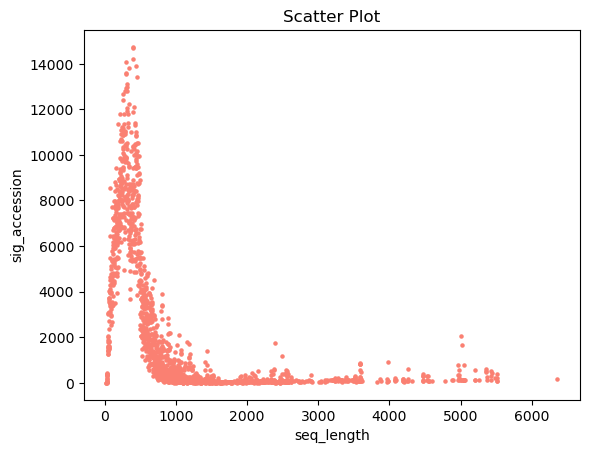

In [90]:
scatter_plotter(feature_num_size)

It shows that there is a moderate inverse relation between the size and the number of features. Also, the scatter plot shows a moderate relation between the mentioned columns.

For the last part of this assignment, I will calculate the Coefficient of the Correlation by using 'InterPro' features to see whether there is any differences between these two relations. 

In [7]:
# make a Dask Dataframe based on the size and number of the InterPro features
interpro_feature_num = ddf.groupby('seq_length').int_accession.count().compute()
interpro_feature_num_size = interpro_feature_num.reset_index()
interpro_feature_num_size.head()

,seq_length,int_accession
0,31,61
1,33,38
2,35,89
3,36,67
4,37,592


In [9]:
# Calculate the 'Coefficient of Correlation'
interpro_coef_corr = interpro_feature_num_size['seq_length'].corr(interpro_feature_num_size['int_accession'], method='pearson')
print(f' THe Coefficient of Correlation between size and number of features is: {interpro_coef_corr}')

 THe Coefficient of Correlation between size and number of features is: -0.5034425026048024


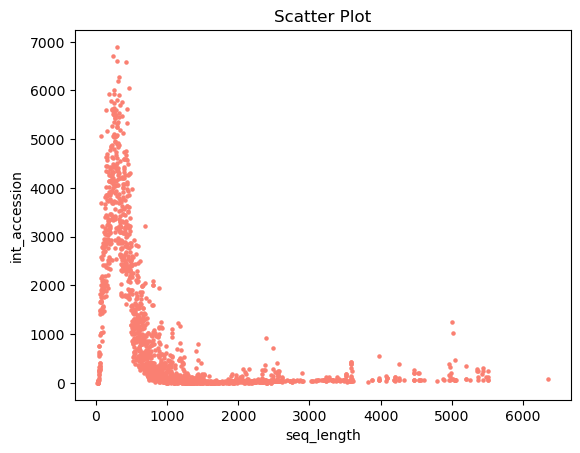

In [12]:
scatter_plotter(interpro_feature_num_size)

It seems that the relations are pretty the same. 